Ce notebook présente quelques points techniques qui vous éviteront certaines difficultés au démarrage du projet :
- utilisation du drive sous Google colab
- chargement des datasets au format .csv


# Utilisation du drive sous  Google Colab

In [ ]:
import os
from google.colab import drive
from pathlib import Path
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix


working_dir = 'drive/MyDrive/Projet_IA' # chemin vers le dossier de travail 
data_dir='drive/MyDrive/Data_IA' # chemin vers le dossier data dans lequel sont déposés les dataset

def init_drive():
  # point de montage de google drive dans google colab
  drive.mount('drive', force_remount=True)
  # création du dossier de travail si celui-ci n'existe pas
  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

init_drive()


Mounted at drive


Vous disposez donc de 4 dataset labélisés : 

*   **Répartition homogème dans les classes** 

WellBalanced_TrainSet.csv : 240000 données (15000 de chaque classe)

WellBalanced_TestSet.csv : 80000 données (5000 de chaque classe)

*   **Répartition homogème dans l'espace des input** 

Representative_TrainSet.csv : 190040 données 

Representative_TestSet.csv : 524654 données






**Génération des tableaux entrées/sorties d'entraînement et de tests**

In [ ]:
import csv
import numpy as np
#importation des bases de données
def load_datatraj(filename):
  Data=[]
  with open("{}/{}.csv".format(data_dir,filename),newline='') as f:
    reader = csv.reader(f,delimiter=',')
    for row in reader:
        Data.append(row)
  return(Data)
#importation de la base de données équilibrée d'entrainement
WB_Train=load_datatraj('WellBalanced_TrainSet')
print(np.shape(WB_Train))

for i in range(5):
  print(WB_Train[i])
print('\n')
#importation de la base de données représentative de test
R_Test=load_datatraj('Representative_TestSet')
print(np.shape(R_Test))

for i in range(5):
  print(R_Test[i])
#importation de la base de données équilibrée de test
WB_Test=load_datatraj('WellBalanced_TestSet')
print(np.shape(WB_Test))
#On imprime pour connaître la position des informations utiles à l'entrainement ou à la vérification du résultat
for i in range(5):
  print(WB_Test[i])

(240001, 10)
['', 'd', 'V init', 'A init', 'V max', 'A max', 'J max', 'Computation Time', 'Trajectory Time', 'Type']
['0', '1.389109462430585', '0.3008668264305069', '-0.1330992443612482', '0.55674464392251', '0.13339235631837895', '0.6802527256381324', '0.0013391971588134766', '5.194156431713527', '13.0']
['1', '1.4367443991963644', '-0.8154387299884486', '-0.21923437968257253', '0.8374613723010328', '0.6412069952273195', '0.46608249765730037', '0.0010459423065185547', '8.108824222885604', '14.0']
['2', '0.1857562494851308', '-0.14081001821299094', '-0.2275365945635316', '0.3121660428478126', '0.8893537865652973', '0.6012699436251457', '0.0009183883666992188', '3.443038436664688', '8.0']
['3', '-0.4129361363786339', '-0.09720940910816034', '0.007058463015909511', '0.10475813099172376', '0.21388530137215142', '0.6245550440242666', '0.0008175373077392578', '4.3667306584663965', '3.0']


(52465, 8)
['', 'd', 'V init', 'A init', 'V max', 'A max', 'J max', 'Type']
['0', '-0.95', '-0.94', '

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as nn

WB_Train_entree = []
WB_Train_sortie = []

WB_Test_entree = []
WB_Test_sortie = []

#conversion en float et on isole uniquement la classe dans WB_Train_sortie
for i in range(1, len(WB_Train)):
  WB_Train_sortie += [float(WB_Train[i][-1])]

  Ls1 = []
  #conversion en float et on isole uniquement les données d'entrée dans WB_Train_entrée
  for j in range(1,len(WB_Train[0])-3):
    Ls1 += [float(WB_Train[i][j])]

  WB_Train_entree += [Ls1]
#conversion en float et on isole uniquement la classe dans WB_Test_sortie
for i in range(1, len(WB_Test)):
  WB_Test_sortie += [float(WB_Test[i][-1])]
  
  Ls2 = []
  #conversion en float et on isole uniquement les données d'entrée dans WB_Test_entrée
  for j in range(1,len(WB_Test[0])-3):
    Ls2 += [float(WB_Test[i][j])]

  WB_Test_entree += [Ls2]


for i in range(10):
  print(WB_Train_sortie[i],WB_Train_entree[i])

for i in range(10):
  print(WB_Test_sortie[i],WB_Test_entree[i])



13.0 [1.389109462430585, 0.3008668264305069, -0.1330992443612482, 0.55674464392251, 0.13339235631837895, 0.6802527256381324]
14.0 [1.4367443991963644, -0.8154387299884486, -0.21923437968257253, 0.8374613723010328, 0.6412069952273195, 0.46608249765730037]
8.0 [0.1857562494851308, -0.14081001821299094, -0.2275365945635316, 0.3121660428478126, 0.8893537865652973, 0.6012699436251457]
3.0 [-0.4129361363786339, -0.09720940910816034, 0.007058463015909511, 0.10475813099172376, 0.21388530137215142, 0.6245550440242666]
14.0 [1.3666157373633083, -0.4216393863279002, -0.7133843769724054, 0.9853054738562923, 0.8342310212075211, 0.4566910678944718]
6.0 [-1.0208634391053335, 0.29993832752059235, -0.25211164192819707, 0.4466754535031039, 0.7286357096993018, 0.6981324828625648]
8.0 [0.24177515044214726, 0.10978042432090696, -0.42285757475355934, 0.3322609305896898, 0.6091051231000234, 0.7322997702914207]
8.0 [1.1040811732661624, -0.15256788712319702, -0.3129675021505469, 0.8539368601055333, 0.469139913

In [ ]:
R_Test_entree = []
R_Test_sortie = []
#conversion en float et on isole uniquement la classe dans R_Test_sortie
for i in range(1, len(R_Test)):
  R_Test_sortie += [float(R_Test[i][-1])]
  #conversion en float et on isole uniquement les données d'entrée dans R_Test_entrée
  Ls = []
  for j in range(1,len(R_Test[0])-1):
    Ls += [float(R_Test[i][j])]
  
  R_Test_entree += [Ls]


for i in range(10):
  print(R_Test_sortie[i],R_Test_entree[i])

12.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.99]
12.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.86625]
8.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.7424999999999999]
8.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.61875]
8.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.495]
0.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.99]
0.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.86625]
0.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.7424999999999999]
8.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.61875]
8.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.495]


**Génération des couches de neurones**

In [ ]:
#On met en place le modèle
model = Sequential()
model.add(Dense(6, input_dim=6, activation='elu', name='Entree'))
model.add(Dense(32, activation='elu', name='Cachee1'))
model.add(Dense(24, activation='elu', name='Cachee2'))
model.add(Dense(16, activation='softmax', name='Sortie'))

**Entraînement et accuracy de l'IA**

In [ ]:
#on met en place les systèmes de mesure et de récompense de notre modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Cette fonction permet de rapporter notre sortie composée de 16 valeurs par prédiction (certitude par classe) sur une matrice colonne indiquant uniquement la classe retenue
WB_Train_sortie_converted = np_utils.to_categorical(np.array(WB_Train_sortie), 16)
#entraînement du réseaux de neurones
model.fit(np.array(WB_Train_entree), WB_Train_sortie_converted, epochs=400, batch_size=1024)

#permet l'affichage des résultats sur l'accuracy
scores = model.evaluate(np.array(WB_Train_entree), WB_Train_sortie_converted)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/400
235/235 [==============================] - 1s 3ms/step - loss: 1.9327 - accuracy: 0.3799
Epoch 2/400
235/235 [==============================] - 1s 3ms/step - loss: 1.0331 - accuracy: 0.6389
Epoch 3/400
235/235 [==============================] - 1s 3ms/step - loss: 0.8191 - accuracy: 0.7076
Epoch 4/400
235/235 [==============================] - 1s 3ms/step - loss: 0.7506 - accuracy: 0.7320
Epoch 5/400
235/235 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.7511
Epoch 6/400
235/235 [==============================] - 1s 3ms/step - loss: 0.6425 - accuracy: 0.7699
Epoch 7/400
235/235 [==============================] - 1s 3ms/step - loss: 0.5903 - accuracy: 0.7891
Epoch 8/400
235/235 [==============================] - 1s 3ms/step - loss: 0.5458 - accuracy: 0.8045
Epoch 9/400
235/235 [==============================] - 1s 3ms/step - loss: 0.5109 - accuracy: 0.8153
Epoch 10/400
235/235 [==============================] - 1s 3ms/step - loss: 0.4840 - accura

**Test de l'IA et matrice de confusion (WB test)**

In [ ]:
#mise en place de la liste de prédiction 
y_pred = model.predict(np.array(WB_Test_entree))
Y_pred = np.argmax(y_pred, 1)

#
cm1 = confusion_matrix(WB_Test_sortie, Y_pred)
print(cm1)

[[4615   87   82    0  100    1    0    0   89    2   21    0    3    0
     0    0]
 [   9 4848    0   84    2   20    0    0    0    0    0    0   30    7
     0    0]
 [ 119    0 4761   22    1    0   85    0   10    0    2    0    0    0
     0    0]
 [   0   25    4 4962    1    0    2    3    0    0    0    0    3    0
     0    0]
 [  53    6    0    0 4719   93   74    0    4   46    1    4    0    0
     0    0]
 [   0   73    0    1   42 4753    0  118    0   12    0    0    0    1
     0    0]
 [   5    0   38    4   19    0 4914   20    0    0    0    0    0    0
     0    0]
 [   0    1    0  117    0   28   64 4789    1    0    0    0    0    0
     0    0]
 [ 165    0   10    0    3    1    0    0 4534   92   88    1  105    0
     1    0]
 [   0    1    0    0   97   16    0    0    7 4801    0   55    2   21
     0    0]
 [   2    0    0    0    0    0    0    0   95    0 4779   29    2    0
    93    0]
 [   0    0    0    0    3    0    0    0    4   76    2 4892    

**Test de l'IA et matrice de confusion (R test)**

In [ ]:
#mise en place listes de prédiction
y_pred = model.predict(np.array(R_Test_entree))
Y_pred = np.argmax(y_pred, 1)

cm2 = confusion_matrix(R_Test_sortie, Y_pred)
print(cm2)

[[12729   163   104     1   211     0     2     0   212     0     4     0
     13     0     0     0]
 [    5  1038     0    11     0     6     0     0     0     0     0     0
      5     0     0     0]
 [   51     0  1807     4     0     0    26     0     4     0     0     0
      0     0     0     0]
 [    0     0     0   123     0     0     0     0     0     0     0     0
      0     0     0     0]
 [   35     0     0     0  4290    52    41     0     4    19     0     0
      0     0     0     0]
 [    0    29     0     0    56  3917     1    54     0     0     0     0
      0     0     0     0]
 [    0     0     5     0     4     0   577     0     0     0     0     0
      0     0     0     0]
 [    0     0     0    10     0     4    44   571     0     0     0     0
      0     0     0     0]
 [  321     0     0     0    23     0     0     0 12575   180    84     0
    255     0     1     0]
 [    0     0     0     0    33     1     0     0     0  1018     0     3
      0    10    

fonction affichage matrice de confusion

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Matrice de confusion WB_Test

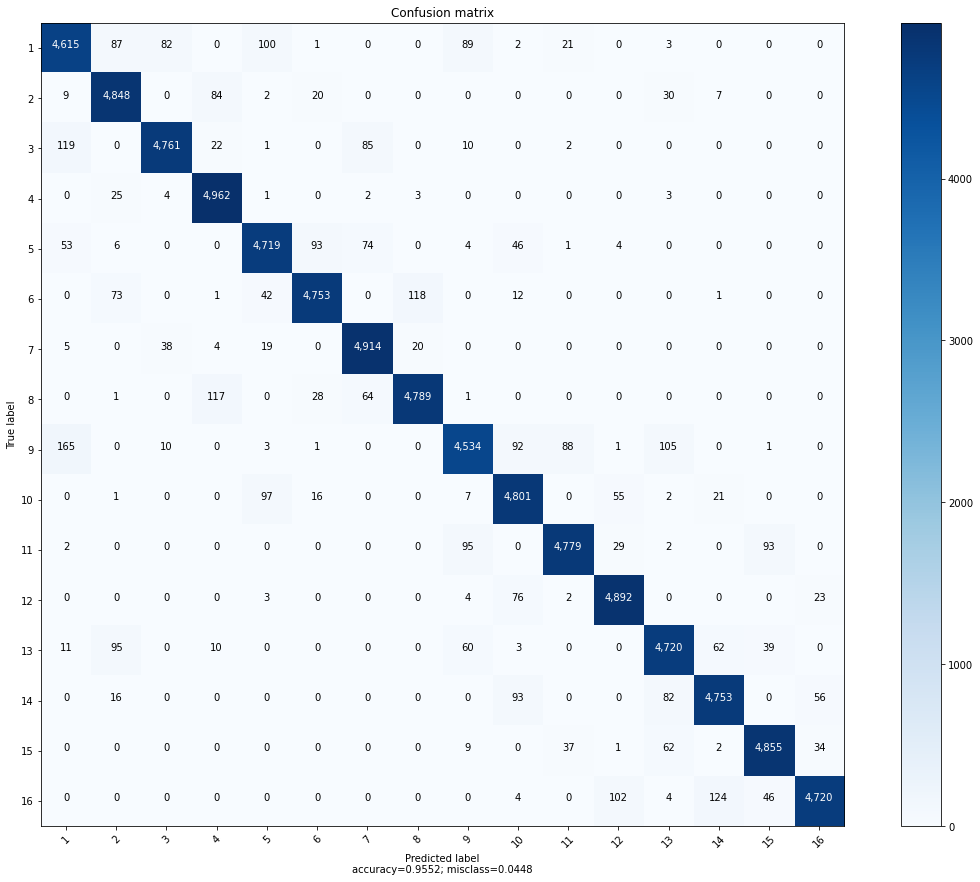

In [ ]:
labelname=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plot_confusion_matrix(cm1, normalize= False, target_names= labelname)

Matrice de confusion R_Test

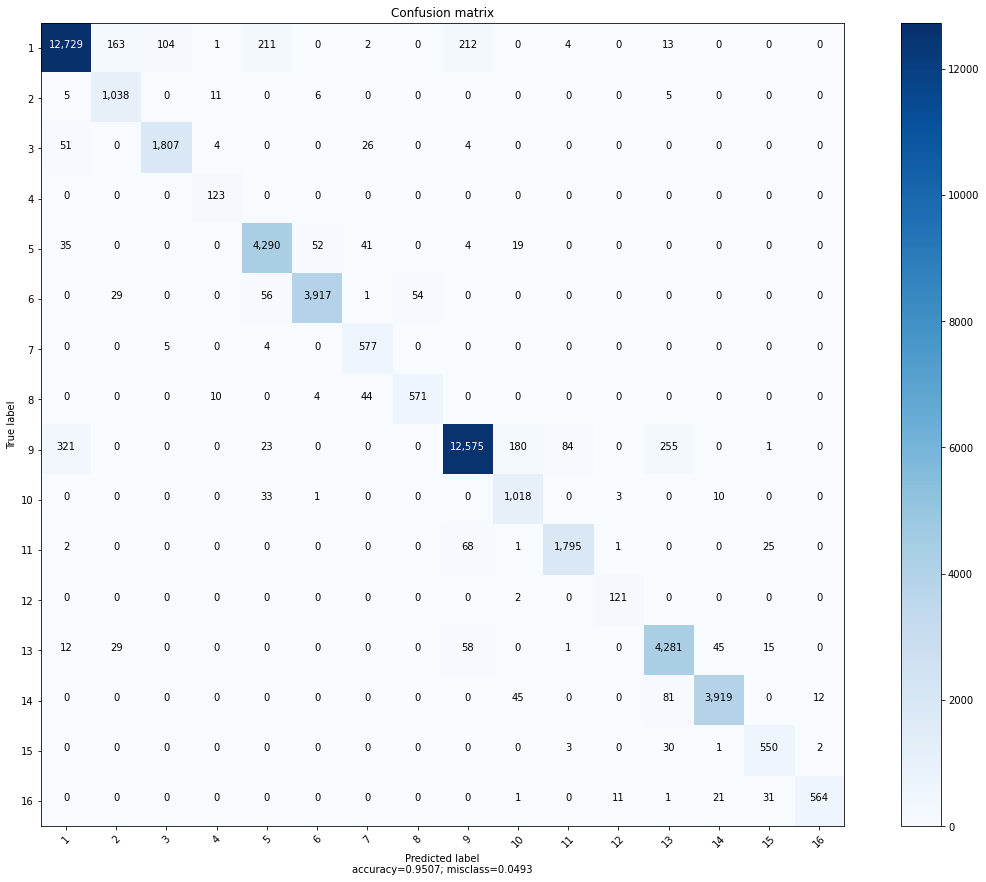

In [ ]:
labelname=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plot_confusion_matrix(cm2, normalize= False, target_names= labelname)

Matrice de confusion normalisée WB_Test

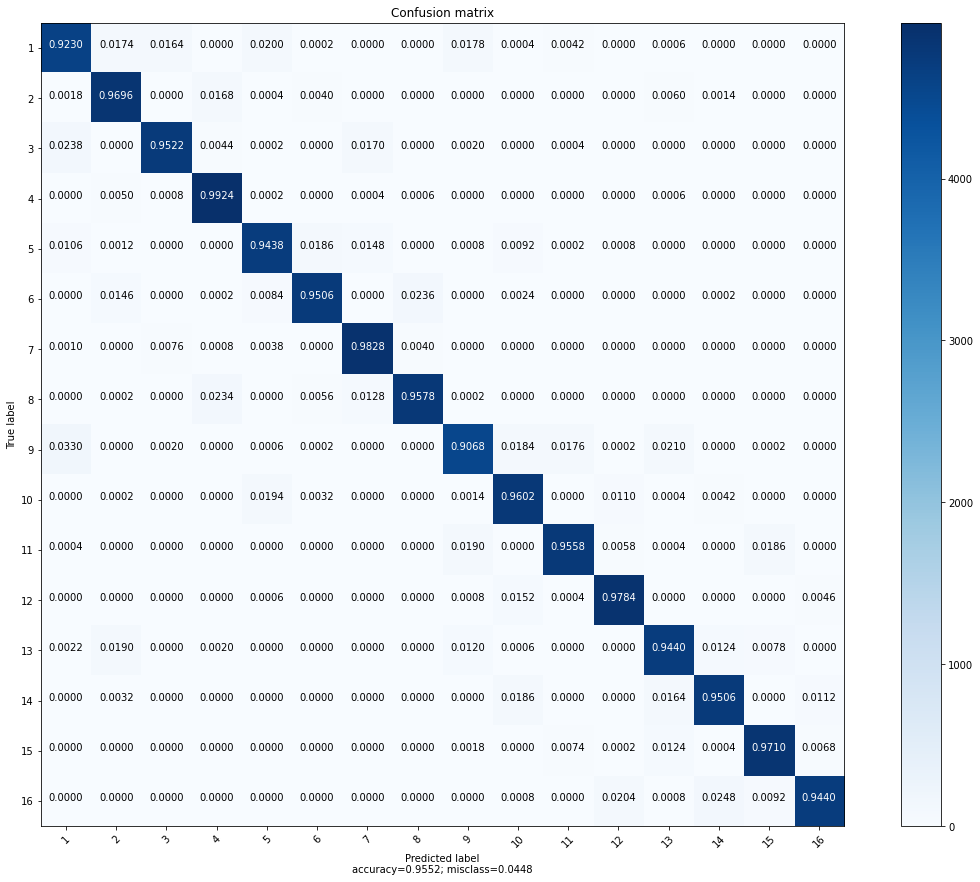

In [ ]:
labelname=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plot_confusion_matrix(cm1, normalize= True, target_names= labelname)

Matrice de confusion normalisée R_Test

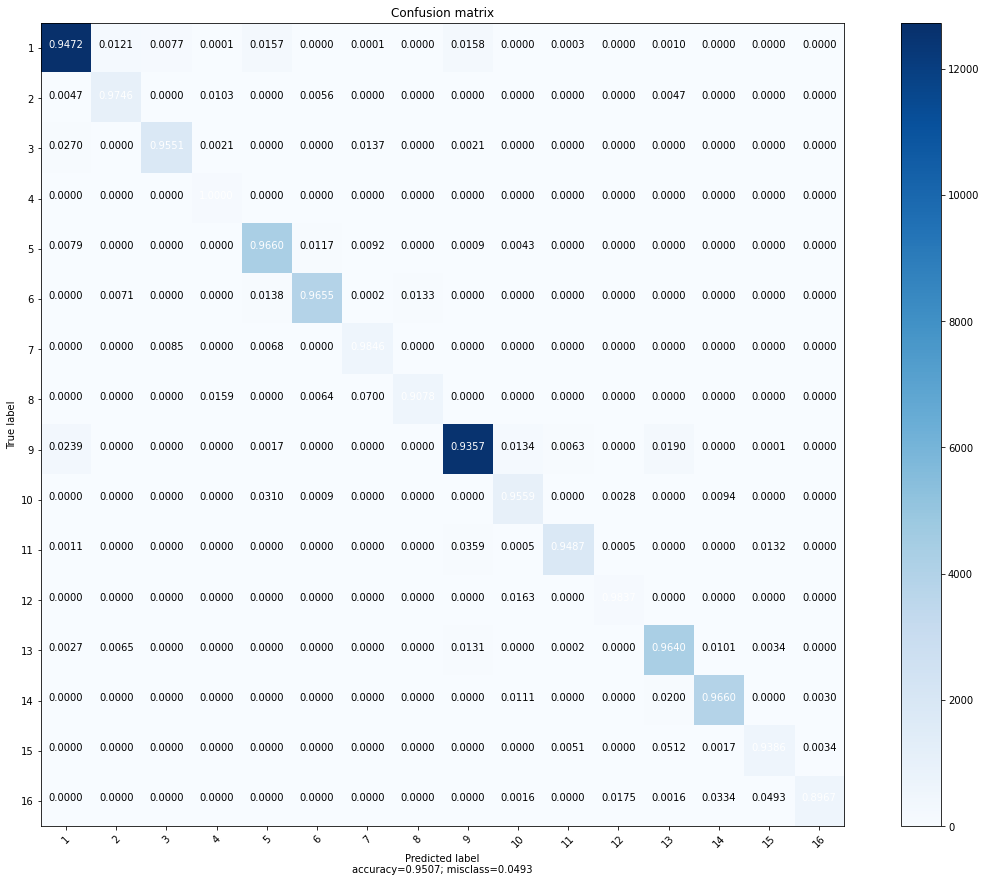

In [ ]:
labelname=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plot_confusion_matrix(cm2, normalize= True, target_names= labelname)

Remarques :

*   'd' représente 'p_final-p_init' dans l'énoncé (distance signée entre la position finale désirée et la position initiale) 
*   'Type' (dernière colonne) correspond au label (index du profil = {0,...15}) 
*   Le dataset "well-balanced" contient des données supplementaires qui ne seront pas utiles : N° d'occurence (1ere colonne), 'Trajectory time' qui est la durée pour identifier le type (index) de profil via l'algorithme, 'Computation time' qui est la durée de la résolution via le solver spécifique.  Vous pouvez noter que la phase d'identification du type de profil via l'algorithme est très gourmande en temps en comparaison à la résolution  via le solver. Une comparaison des temps de prédiction du type de profil via votre réseau de neurones avec ceux de l'algorithme sera toutefois biaisée car l'environnement de calcul n'est pas le même (PC vs Google colab) 